<a href="https://colab.research.google.com/github/Biswajeet1995/playstore-app/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## **Import the Libraries**

In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#preprocessing & dataframe creation
import pandas as pd
#scientific and mathemetical calc
import numpy as np
#visualizaton
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline


In [ ]:
#To select the file from our google drive
path='/content/drive/MyDrive/capstone project/Copy of Play Store Data.csv'

In [ ]:
df=pd.read_csv(path)

In [ ]:
#lets start and check first rows of our assigned file  
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#checking how many columns we have in our data
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
#now we check how many rows and column we have in out data
df.shape

(10841, 13)

# ***1 Data clean up – Missing value treatment***

In [ ]:
# Statistical Description of data frame
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 10841 rows and 13 columns in play store app data frame, dataset seems to have missing values most of which occurs for the Rating column, all the other column except Rating are in object datatype. So, the clean up is required.

In [ ]:
#our first moto to check the total info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#Checking the columns with only integer value and describe it
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
df=df.dropna(subset=['Rating'],axis=0)

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [ ]:
#Check the null vaue in android version
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


As the app "life made Wifi" has a nan value in android version as well as in content rating so i dropped this column

In [ ]:
df.drop([10472],inplace=True)

In [ ]:
#lets check again wheather the row was deleted or not
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Replace the android version with the mode.

In [ ]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0],inplace=True) #or with mean or median

In [ ]:
#check again our data how many coluns have null values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

so we have 4 current versions having null value so lets replce them too

In [ ]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Now we have no null value present in our data so we can easily extract the data

# **So now we will correct the data type**

> Indented block



In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 2. Data clean up – correcting the data types


Size column has field value as 19M which should be numeric.
and price should be fully numeric and we have to remove "$" sign and convert to float

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [ ]:
#Removing the row with size like varies with devices

temp=df[df['Size']=='Varies with device'].index
df.drop(labels=temp,inplace=True)

In [ ]:
#we converted the whole size column to kb
New_size=[]
for i in df['Size']:
      rep=i.replace('M','e3')
      rep=rep.replace('k',' ')
      rep=rep.replace('+',' ')
      New_size.append(float(rep))
      #New_size.append(i.replace('M','').replace('+',' ').replace('k',' ').strip())
     

In [ ]:
df['Size']=New_size

In [ ]:
df['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+03, 2.50e+04, 2.80e+03, 5.60e+03,
       2.90e+04, 3.30e+04, 3.10e+03, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+03, 5.50e+03, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+03, 2.30e+04, 6.00e+03, 6.10e+03, 4.60e+03,
       9.20e+03, 5.20e+03, 1.10e+04, 2.40e+04, 9.40e+03, 1.50e+04,
       1.00e+04, 1.20e+03, 2.60e+04, 8.00e+03, 7.90e+03, 5.60e+04,
       5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02, 3.60e+03, 5.70e+03,
       8.60e+03, 2.40e+03, 2.70e+04, 2.50e+03, 7.00e+03, 1.60e+04,
       3.40e+03, 8.90e+03, 3.90e+03, 2.90e+03, 3.80e+04, 3.20e+04,
       5.40e+03, 1.80e+04, 1.10e+03, 2.20e+03, 4.50e+03, 9.80e+03,
       5.20e+04, 9.00e+03, 6.70e+03, 3.00e+04, 2.60e+03, 7.10e+03,
       2.20e+04, 6.40e+03, 3.20e+03, 8.20e+03, 4.90e+03, 9.50e+03,
       5.00e+03, 5.90e+03, 1.30e+04, 7.30e+04, 6.80e+03, 3.50e+03,
       4.00e+03, 2.30e+03, 2.10e+03, 4.20e+04, 9.10e+03, 5.50e+04,
       2.30e+01, 7.30e+03, 6.50e+03, 1.50e+03, 7.50e+03, 5.10e

Price variable – remove $ sign and convert to float

1.   List item
2.   List item



In [ ]:
New_price=[]
for i in df['Price']:
    if i[0]=='$':
        New_price.append(i[1:]) #removing $ and append to new list
    else:
        New_price.append(i)

**apart from mix data in 'Price' column there is a catagorical value as'everyone',which needs to remove/drop**

In [ ]:
df.drop(labels=df[df['Price']=='Everyone'].index,inplace=True)

In [ ]:
df['Price']=New_price

In [ ]:
#lets see the unique values that presesnt in price column
df['Price'].unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [ ]:
#our price colum has a datatype of object so we have to conver it into float 
df['Price']=df['Price'].astype('float')

In [ ]:
#lets check oue data
df.head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Now time to remove ‘,’ and ‘+’ sign from install column data & convert to integer

In [ ]:
install2=[]
for j in df['Installs']:
    install2.append(j.replace(',','').replace('+','').strip())

In [ ]:
df['Installs']=install2

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#As install and review is always be numeric and can not be a float type so we will convert into integer datatype
df['Installs']=df['Installs'].astype('int')
df['Reviews']=df['Reviews'].astype('int')

# 3. Sanity checks – check for the following and handle accordingly

In [ ]:
#lets check is there any app whose rating is below 1 and above 5
df.loc[(df['Rating']<=1)&(df['Rating']>=5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Reviews should not be more than installs as only those who installed can review the app.so we should drop them.

In [ ]:
df.loc[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [ ]:
temp=df[df['Reviews']>df['Installs']].index
df.drop(labels=temp,inplace=True)

lets check again is there any app that is higher reviews but less install



In [ ]:
df.loc[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

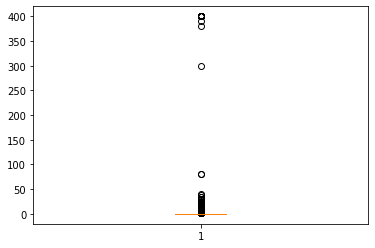

In [ ]:
#now we will check the price range with box plot
plt.boxplot(df['Price'])
plt

In [ ]:
#apps having price more than 200$
df.loc[df['Price']>=200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


# Data analysis

In [ ]:
Installs_Cat =df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
Installs_Cat.head()

,Category,Installs
0,GAME,29874452700
1,FAMILY,6798433580
2,COMMUNICATION,4941915530
3,NEWS_AND_MAGAZINES,4251900550
4,TOOLS,3526053500


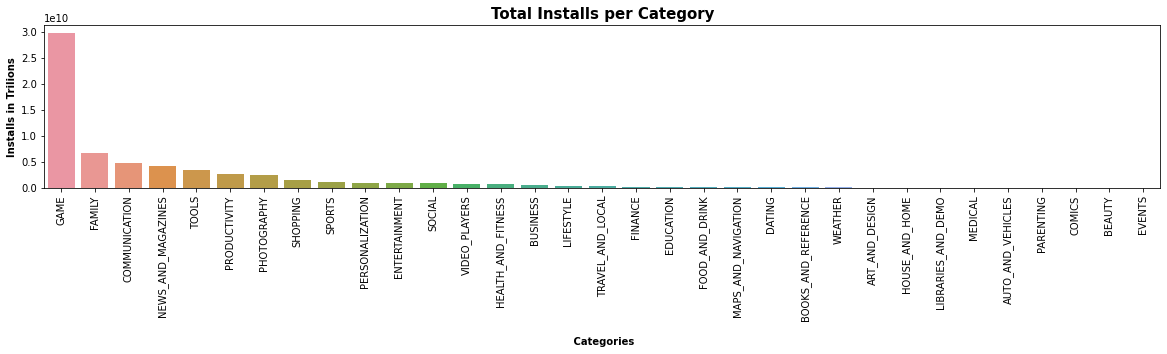

In [ ]:
df2= plt.subplots(figsize =(20,3))
sns.barplot(x=Installs_Cat['Category'], y=Installs_Cat['Installs'])
plt.xlabel('\n Categories', fontsize = 10, fontweight = 'bold')
plt.ylabel('Installs in Trilions', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.title('Total Installs per Category', fontsize = 15, fontweight = 'bold')
plt.savefig('Total Installs per Category.png')
plt.show()

In [ ]:
def insights_func(new_df_k,ki):
  size_vs_installs = new_df_k[['Size','Installs']]
  size_vs_installs = size_vs_installs.loc[~size_vs_installs['Size'].isin(['Varies with device'])]
  size_vs_installs.set_index('Size',inplace=True)
  size_vs_installs.sort_index(inplace=True)
  plt.figure()
  plt.title(ki)
  plt.xlabel('size') 
  plt.ylabel('Installs')
  plt.plot(size_vs_installs)
  plt.show()
  #insights for free vs paid installs
  paid_vs_free = df.groupby(['Type'])['Installs'].sum()
  paid_vs_free.plot(kind='bar')
  plt.title(ki)
  #insights for content rating vs installs
  content_vs_installs = df.groupby(['Content Rating'])['Installs'].sum()
  content_vs_installs.plot(kind = 'bar')
  plt.title(ki)
  #insights for rating vs installs
  size_vs_installs = df[['Rating','Installs']]
  # size_vs_installs = size_vs_installs
  size_vs_installs.set_index('Rating',inplace=True)
  size_vs_installs.sort_index(inplace=True)
  plt.figure()
  plt.title(ki)
  plt.xlabel('Rating') 
  plt.ylabel('Installs')
  plt.plot(size_vs_installs)
  plt.show()
  #insights for version vs installs
  version_vs_installs = new_df.groupby(['Android Ver'])['Installs'].sum()
  version_vs_installs.plot(kind = 'bar')
  plt.title(ki)

['HOUSE_AND_HOME', 'COMMUNICATION', 'SOCIAL', 'TOOLS', 'BOOKS_AND_REFERENCE', 'SHOPPING', 'FOOD_AND_DRINK', 'WEATHER', 'VIDEO_PLAYERS', 'BEAUTY', 'NEWS_AND_MAGAZINES', 'BUSINESS', 'TRAVEL_AND_LOCAL', 'ART_AND_DESIGN', 'PHOTOGRAPHY', 'EVENTS', 'AUTO_AND_VEHICLES', 'LIBRARIES_AND_DEMO', 'PERSONALIZATION', 'COMICS', 'ENTERTAINMENT', 'GAME', 'HEALTH_AND_FITNESS', 'SPORTS', 'DATING', 'FAMILY', 'PRODUCTIVITY', 'MEDICAL', 'PARENTING', 'MAPS_AND_NAVIGATION', 'FINANCE', 'LIFESTYLE', 'EDUCATION']


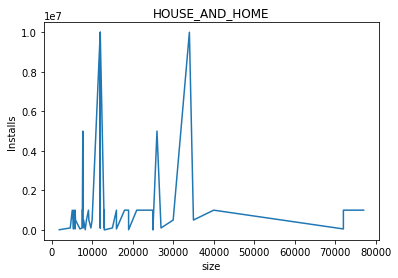

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


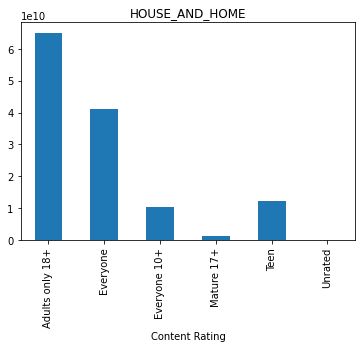

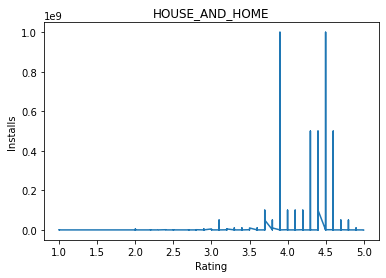

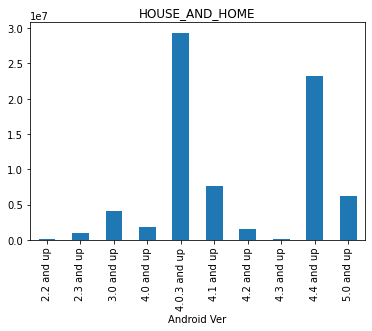

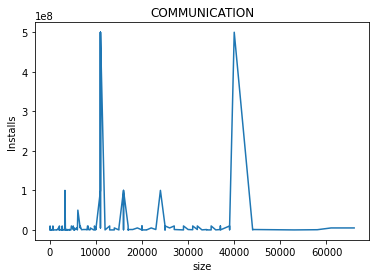

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


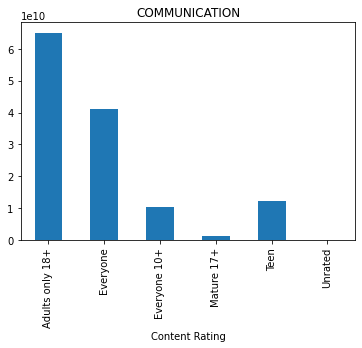

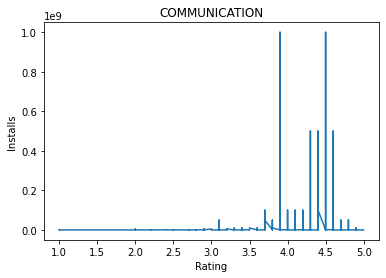

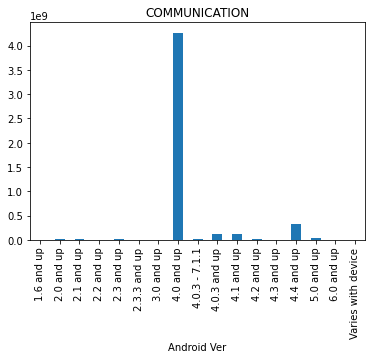

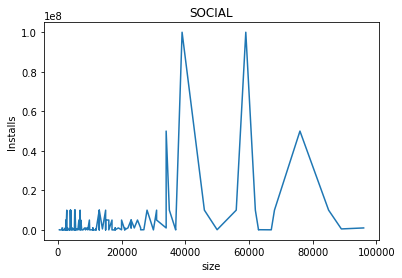

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


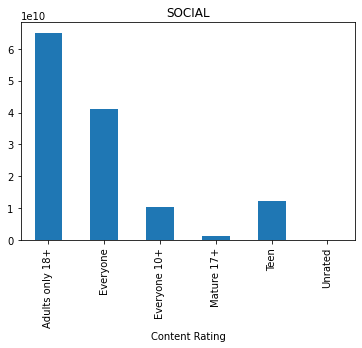

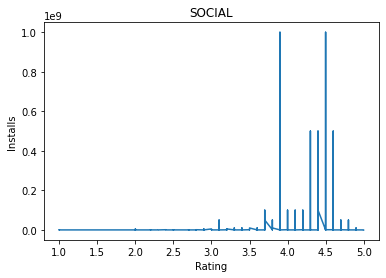

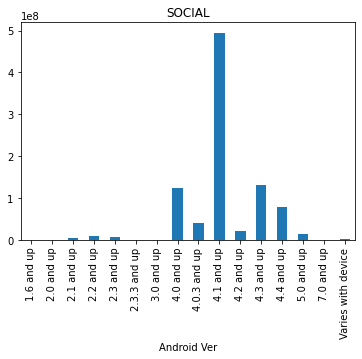

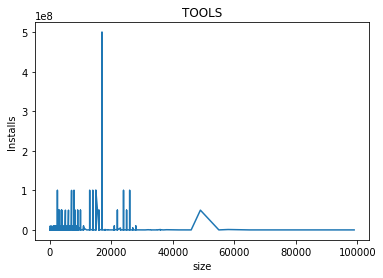

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


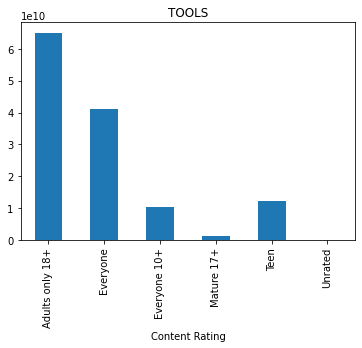

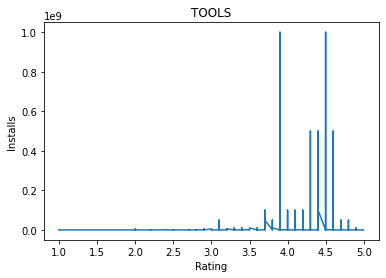

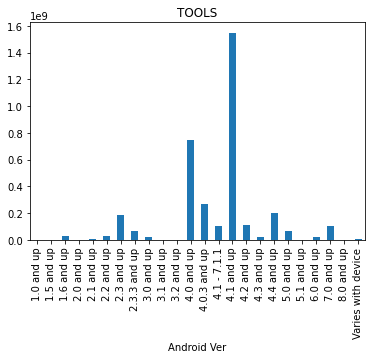

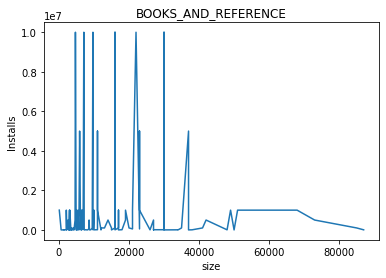

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


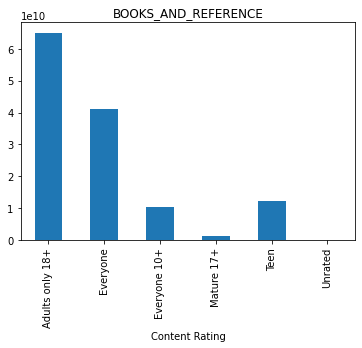

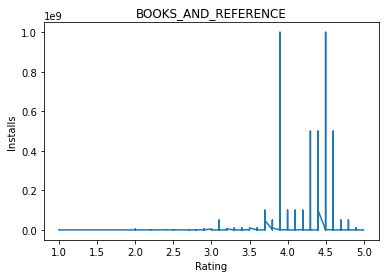

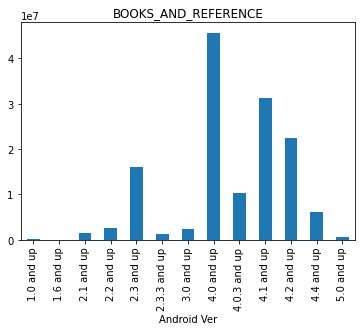

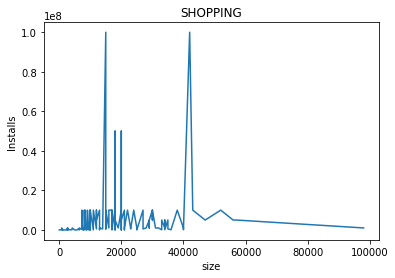

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


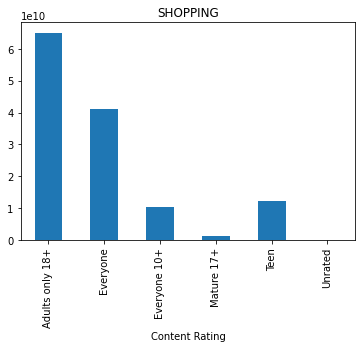

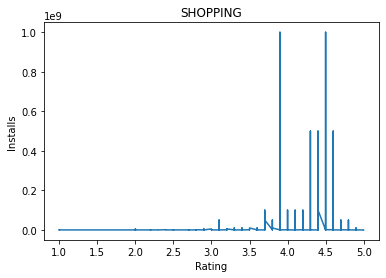

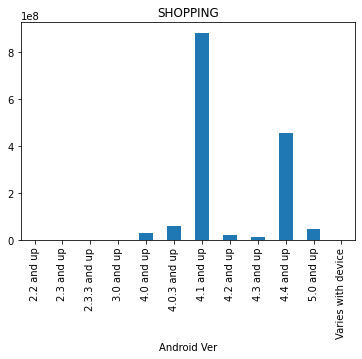

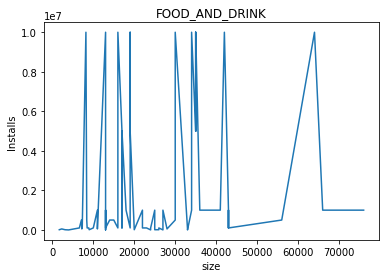

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


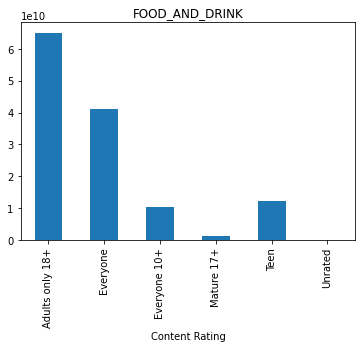

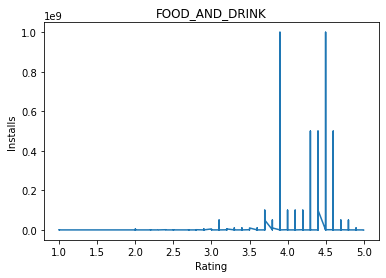

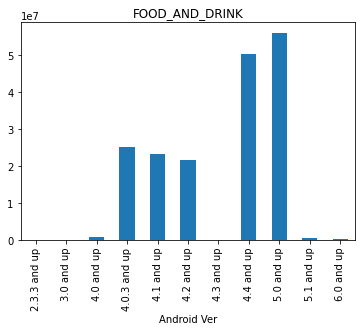

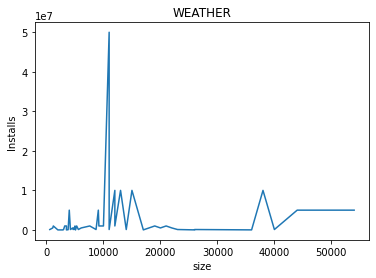

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


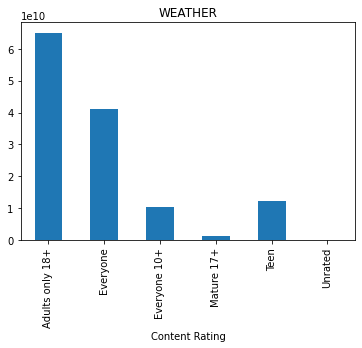

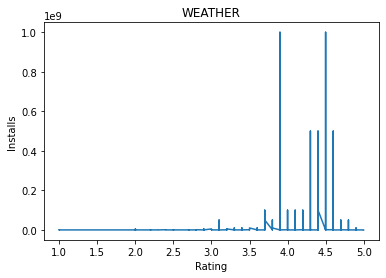

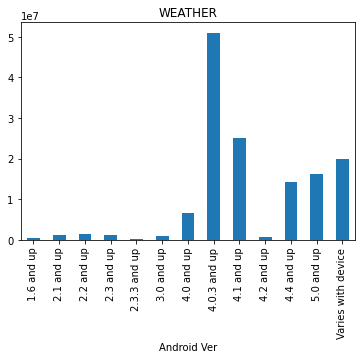

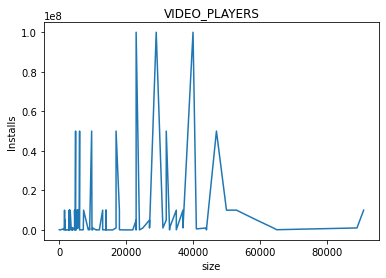

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


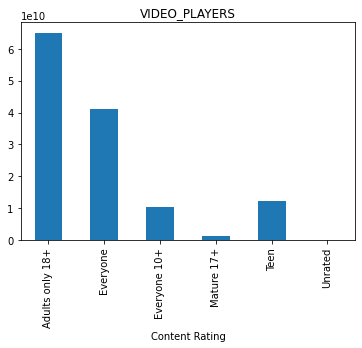

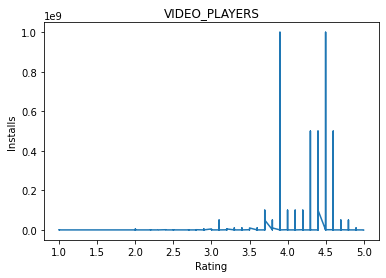

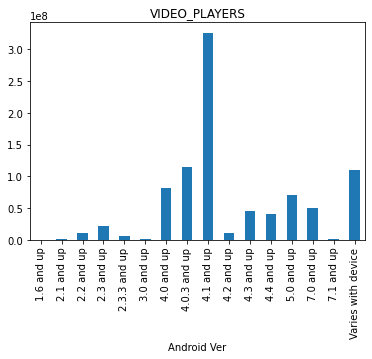

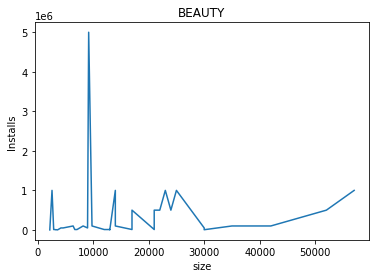

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


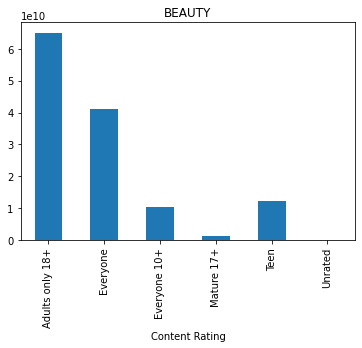

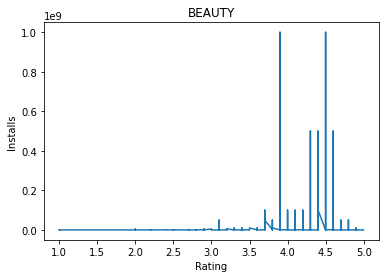

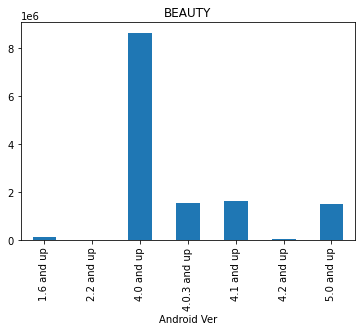

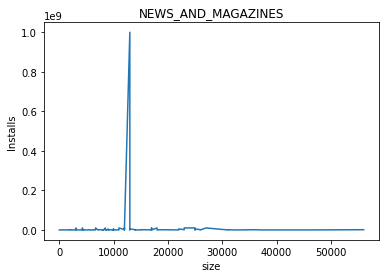

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


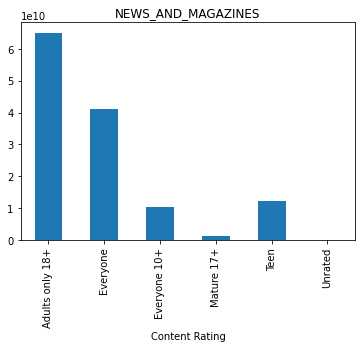

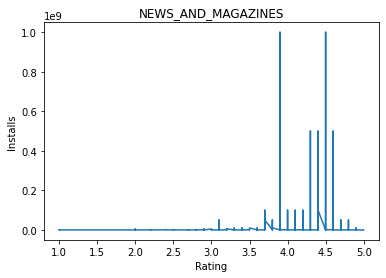

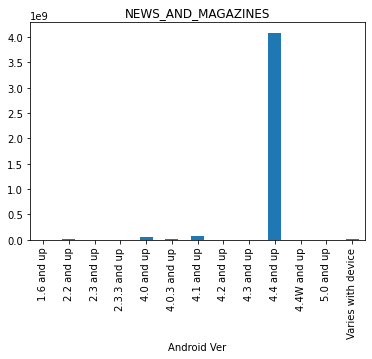

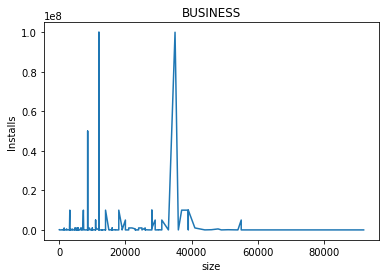

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


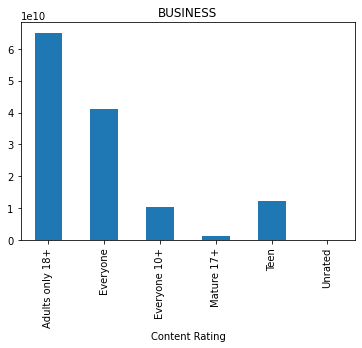

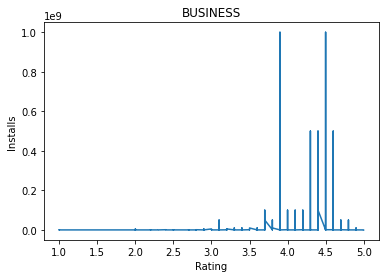

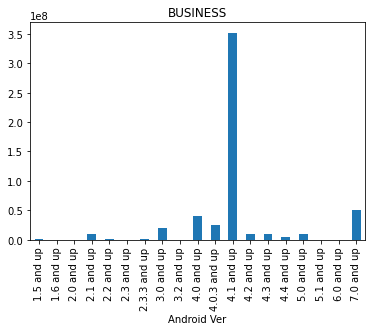

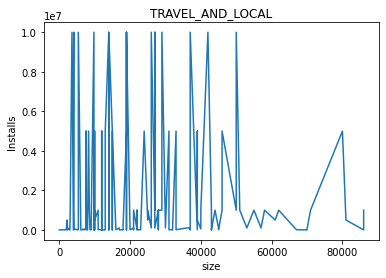

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


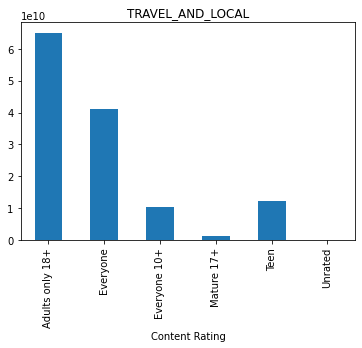

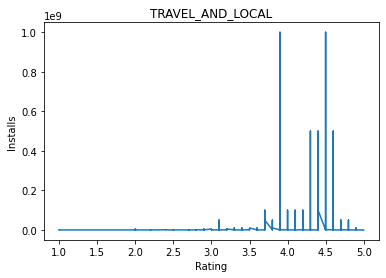

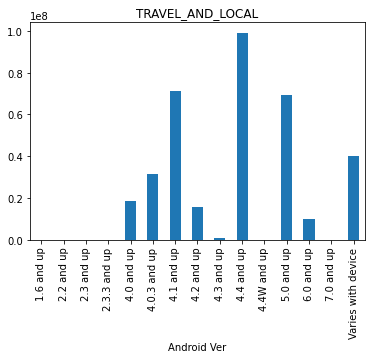

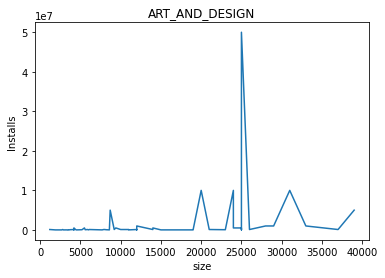

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


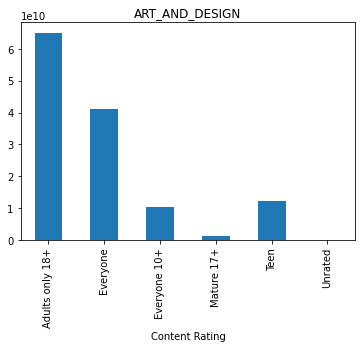

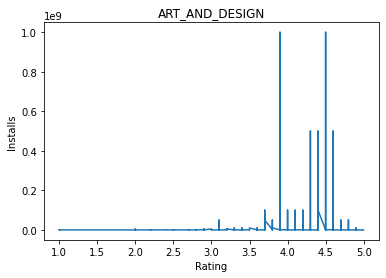

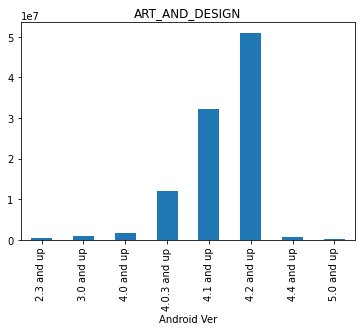

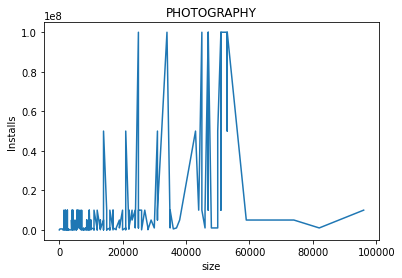

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


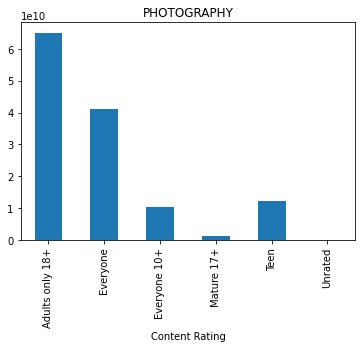

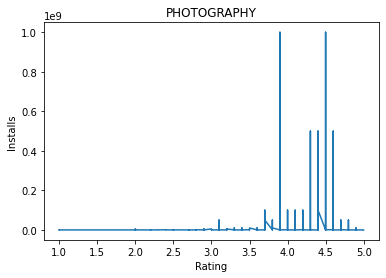

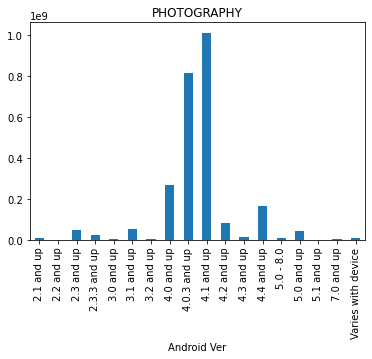

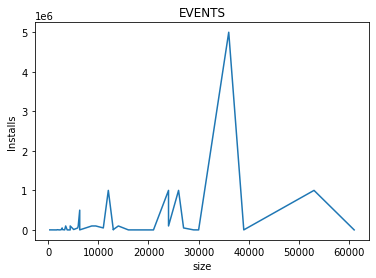

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


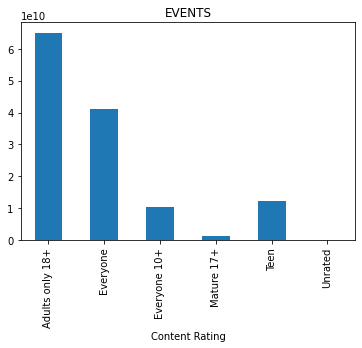

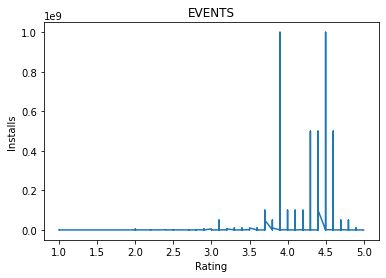

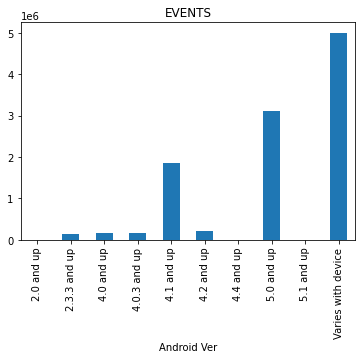

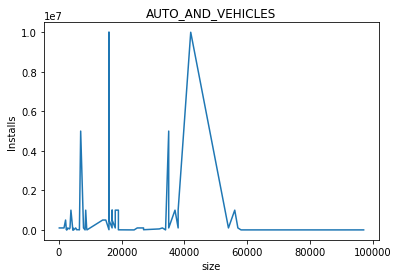

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


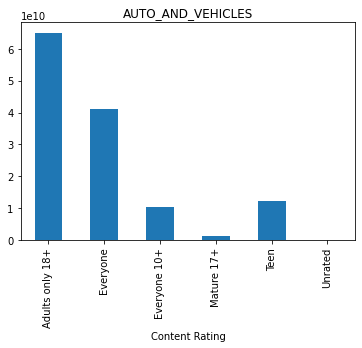

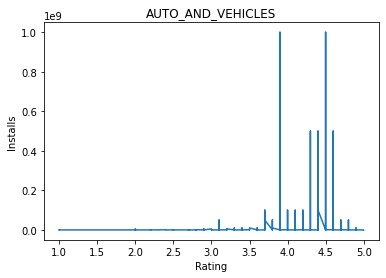

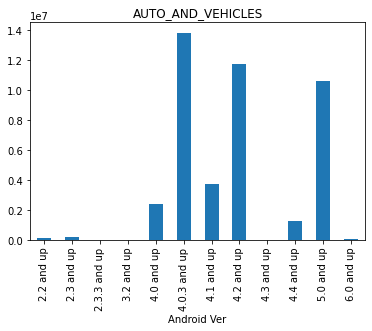

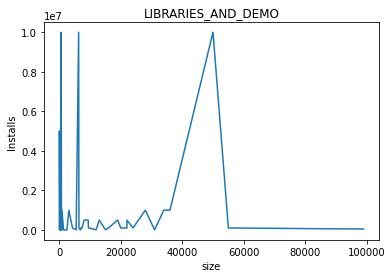

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


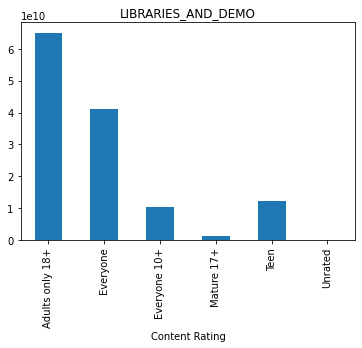

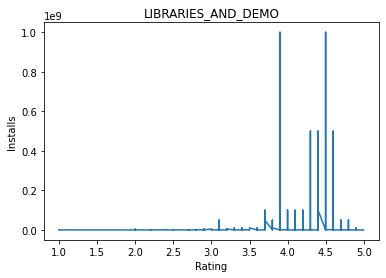

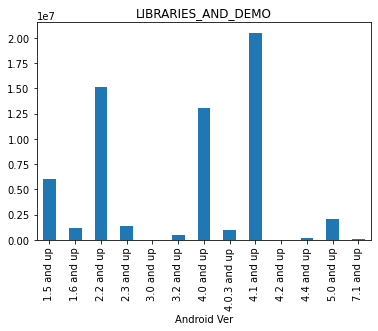

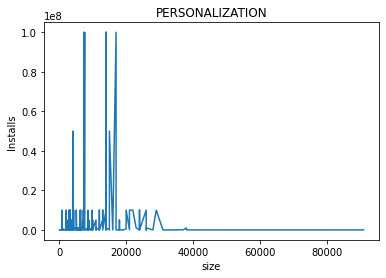

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


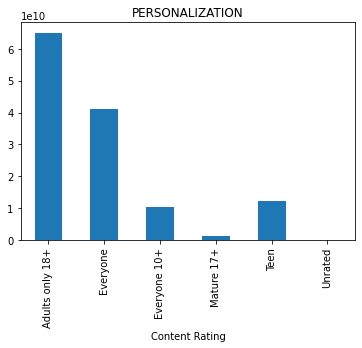

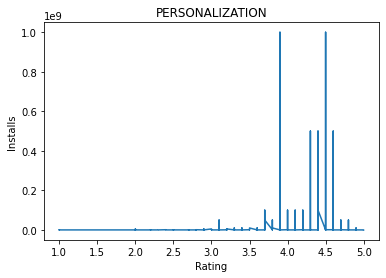

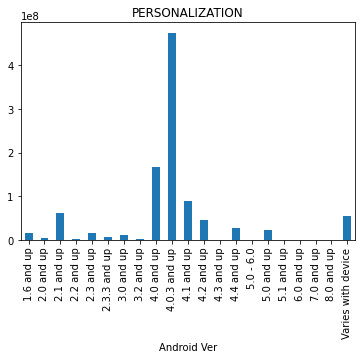

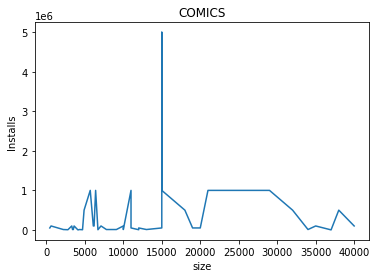

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


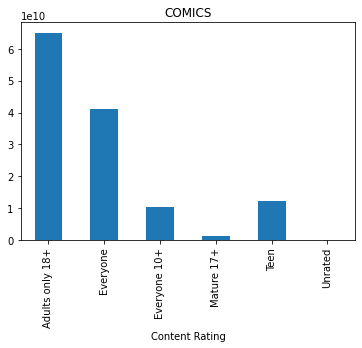

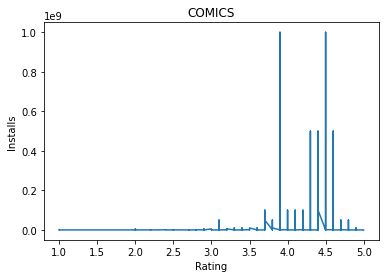

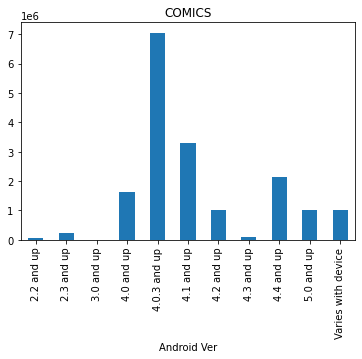

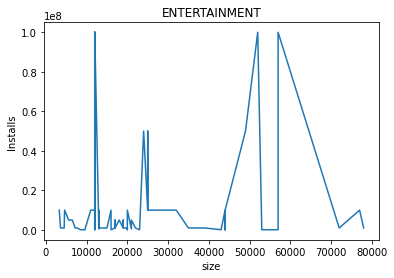

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


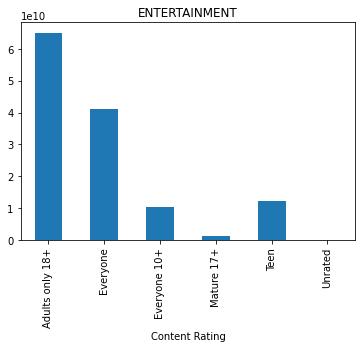

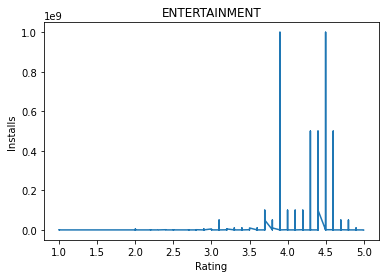

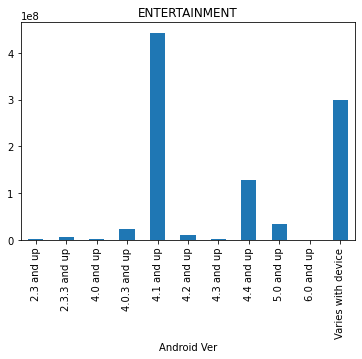

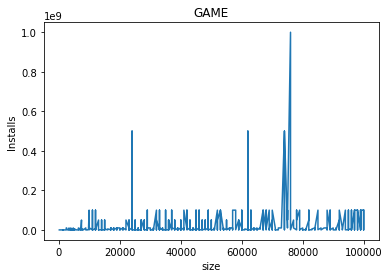

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


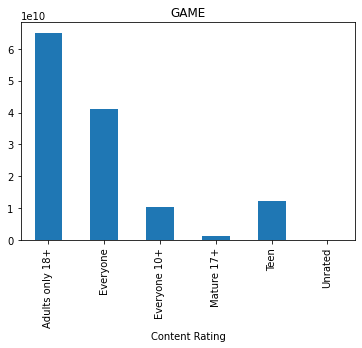

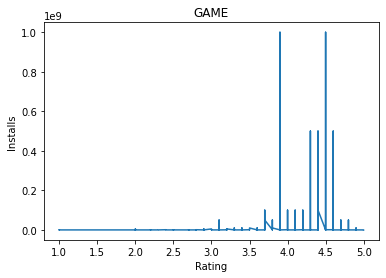

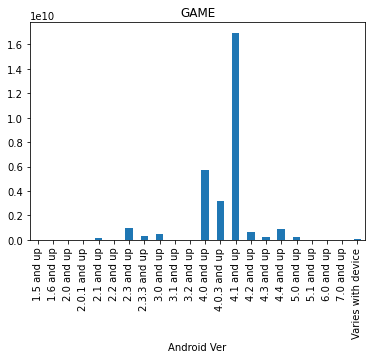

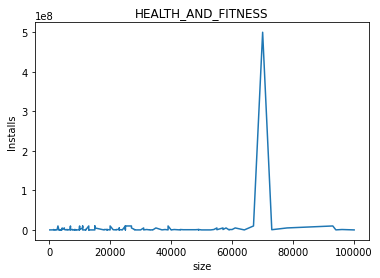

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


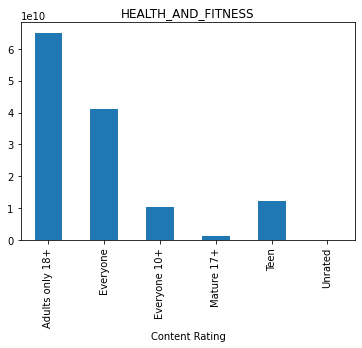

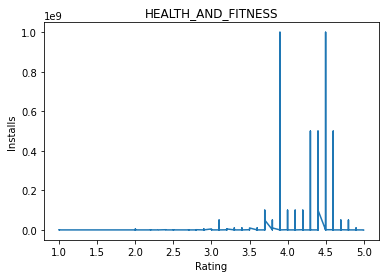

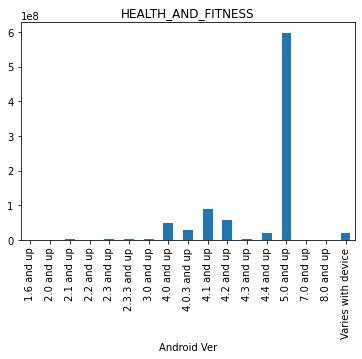

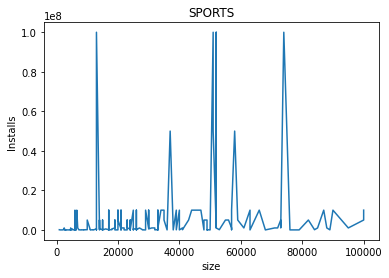

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


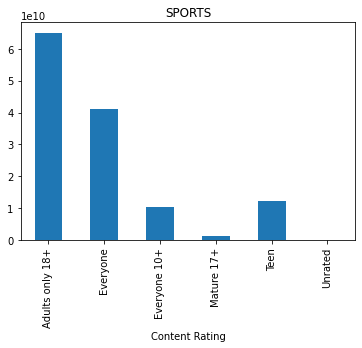

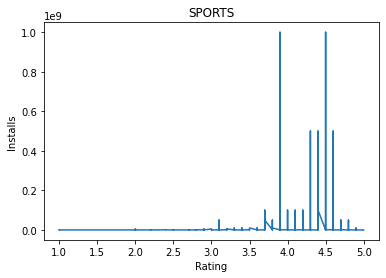

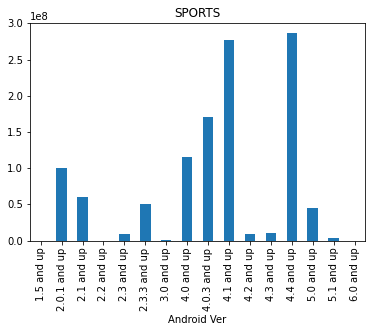

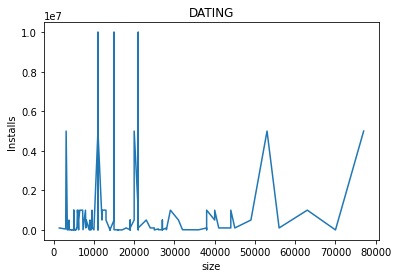

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


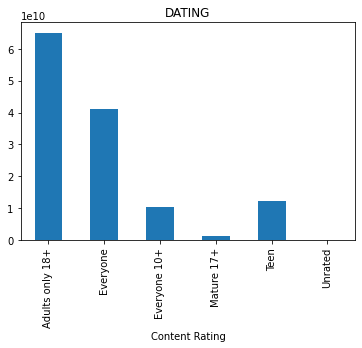

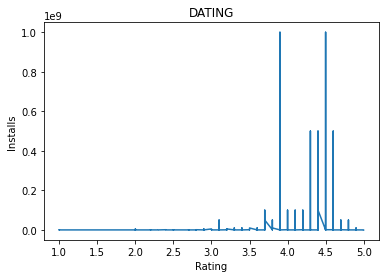

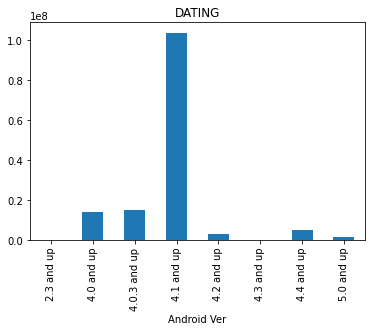

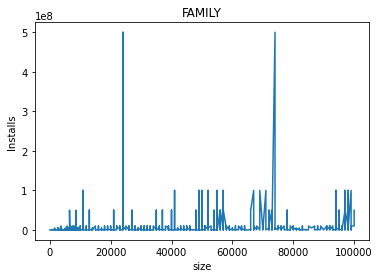

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


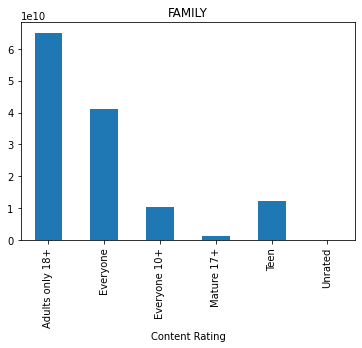

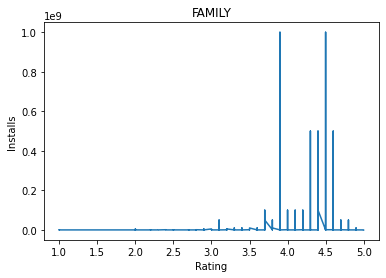

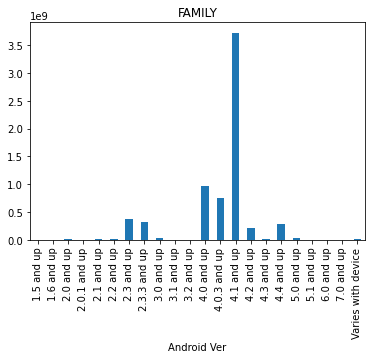

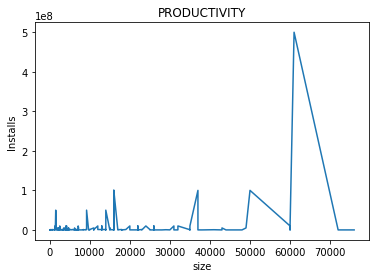

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


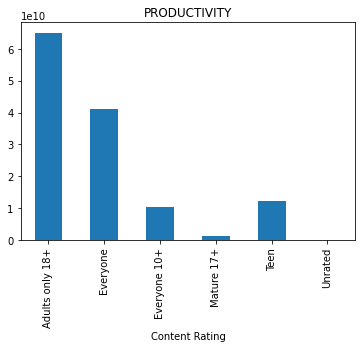

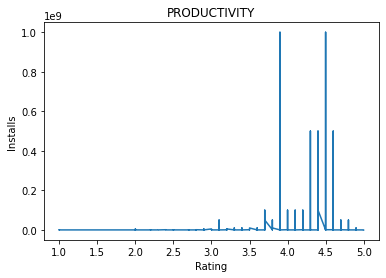

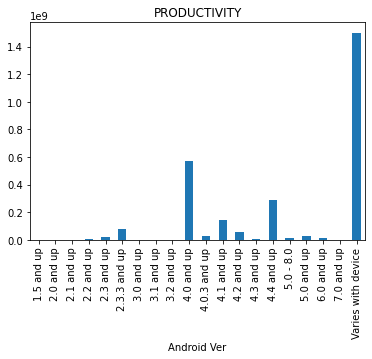

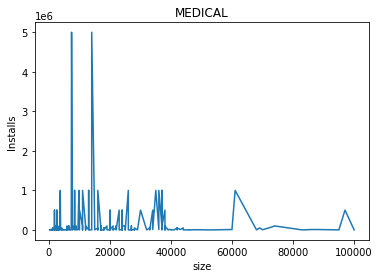

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


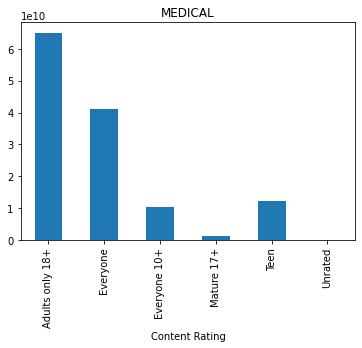

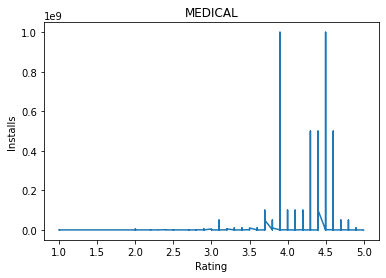

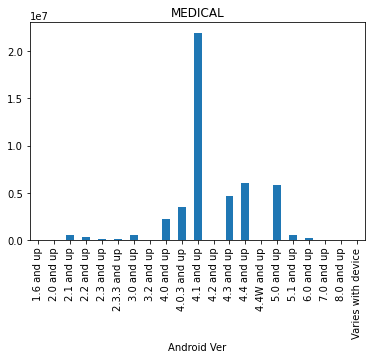

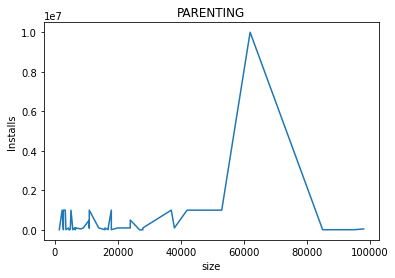

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


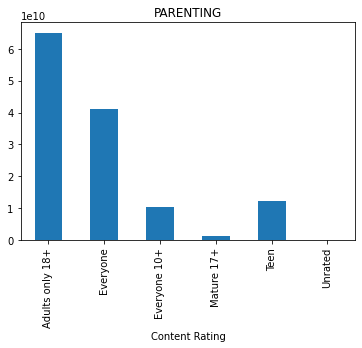

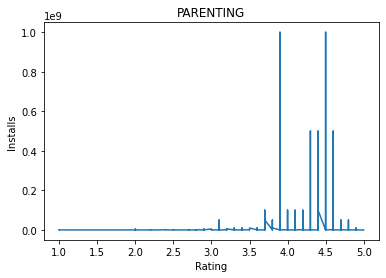

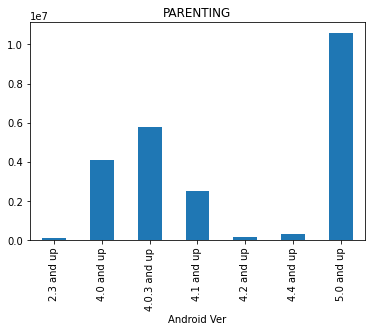

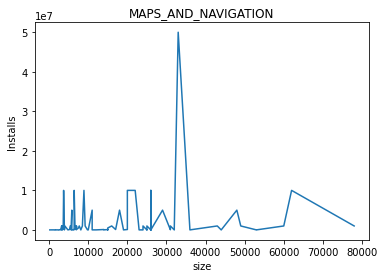

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


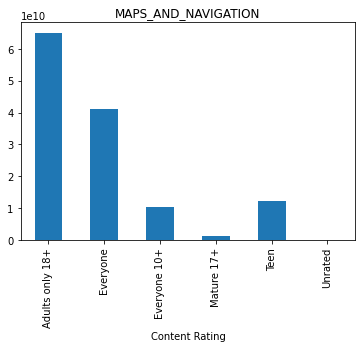

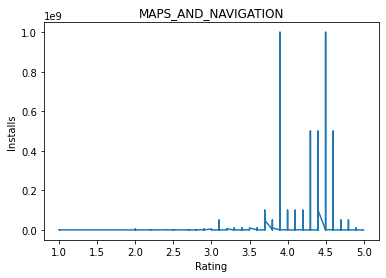

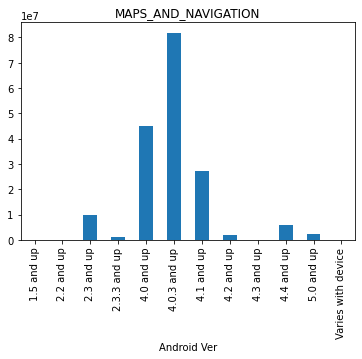

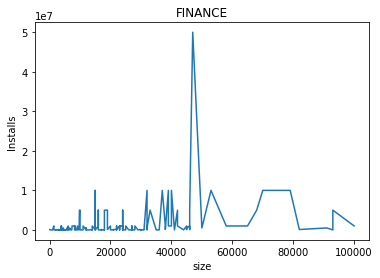

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


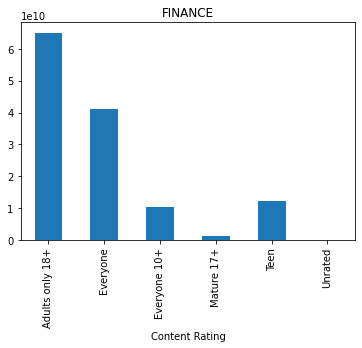

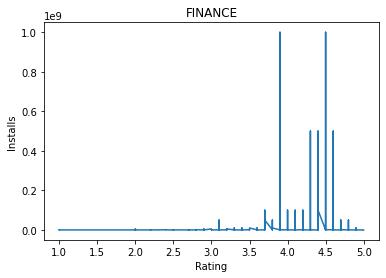

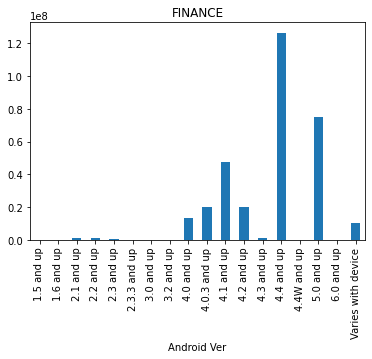

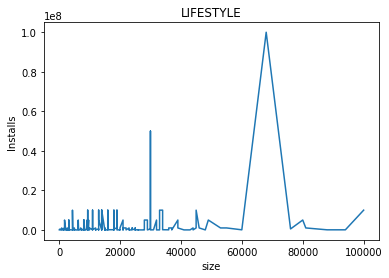

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


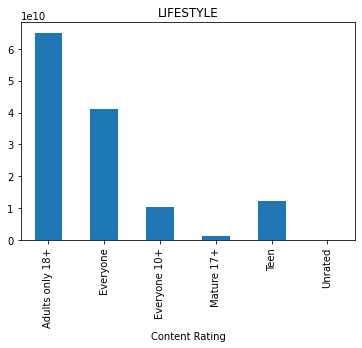

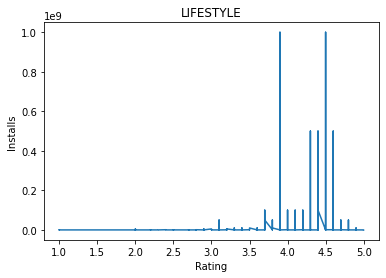

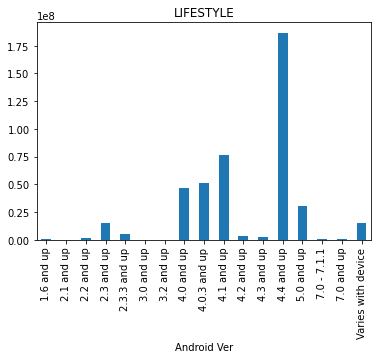

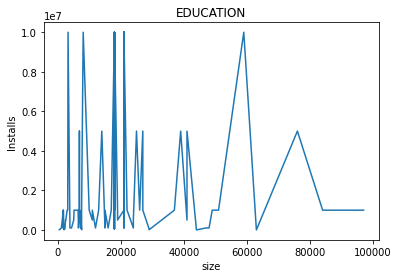

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


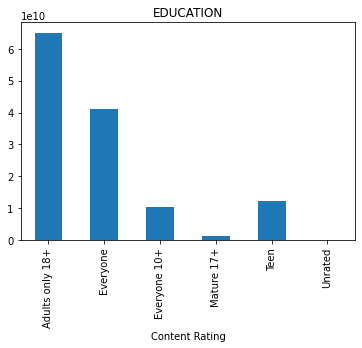

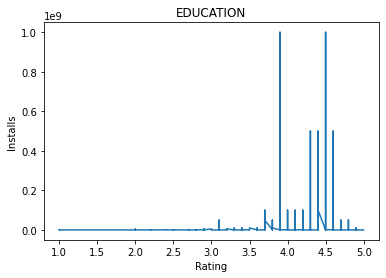

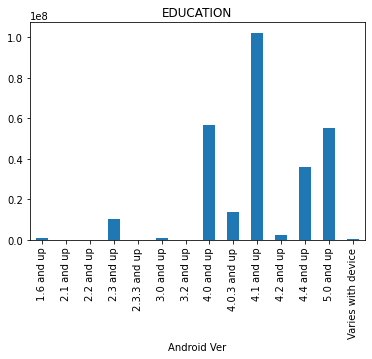

In [ ]:
kfd = (df[['Category']])
tft =  kfd.values.tolist()
kft = []
for i in tft:
  kft.append(i[0])
kft = list(set(kft))
print(kft)
for i in kft:
  new_df = df[df['Category'] == i]
  # print(new_df)
  # print(type(new_df))
  insights_func(new_df,i)


In [ ]:
#checking the users of android versions
Av=df['Android Ver'].value_counts()
print(Av)


4.1 and up            1931
4.0.3 and up          1193
4.0 and up            1108
4.4 and up             806
2.3 and up             563
5.0 and up             490
4.2 and up             318
2.3.3 and up           235
3.0 and up             211
2.2 and up             206
4.3 and up             195
2.1 and up             113
1.6 and up              87
Varies with device      56
6.0 and up              45
7.0 and up              39
3.2 and up              31
2.0 and up              27
5.1 and up              17
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
7.1 and up               2
7.0 - 7.1.1              1
5.0 - 6.0                1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64


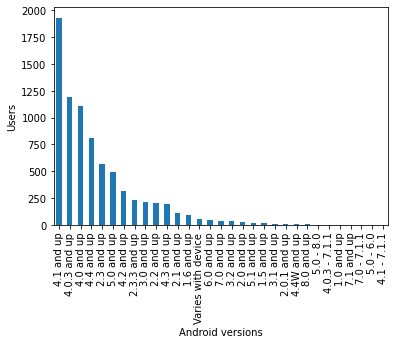

In [ ]:
Av.plot.bar()
plt.ylabel('Users')
plt.xlabel('Android versions')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

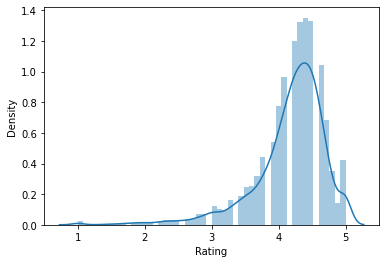

In [ ]:
#lets see the review density
sns.distplot(df['Rating'])
plt

In [ ]:
skew_dist=df['Rating'].skew()
mean=df['Rating'].mean()
median=df['Rating'].median()
print('the skew distribution of ratings',skew_dist)
print('the mean distribution of ratings',mean)
print('the median of disrtibution of ratings',median)


the skew distribution of ratings -1.7534741909171385
the mean distribution of ratings 4.1732098925288135
the median of disrtibution of ratings 4.3


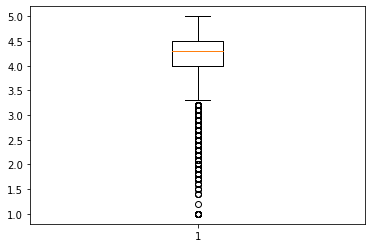

In [ ]:
plt.boxplot(df['Rating'])
plt.show()

lets check how many free apps and paid apps are there in pr data

In [ ]:
#identify the different types
df['Type'].value_counts()

Free    7146
Paid     577
Name: Type, dtype: int64

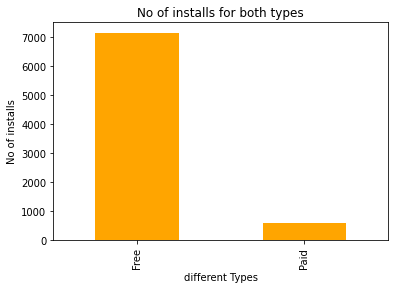

In [ ]:
df1=df.groupby(['Type'])['Installs'].count()
df1.plot.bar(color='orange')
plt.title('No of installs for both types')
plt.ylabel('No of installs')
plt.xlabel('different Types')
plt.show()

([<matplotlib.patches.Wedge at 0x7f0b34f5f110>,
 [Text(-1.0698388778653163, 0.2558217649221446, 'Free'),
  Text(1.0698388599014919, -0.2558218400463028, 'Paid')],
 [Text(-0.583548478835627, 0.13953914450298793, '92.5%'),
  Text(0.5835484690371774, -0.13953918547980151, '7.5%')])

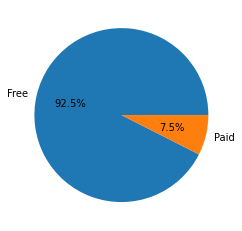

In [ ]:
#checking the ratio of types
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')

In [ ]:
#howmany types of contents rating are present and whats is the count
df['Content Rating'].value_counts()

Everyone           6167
Teen                867
Mature 17+          368
Everyone 10+        318
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

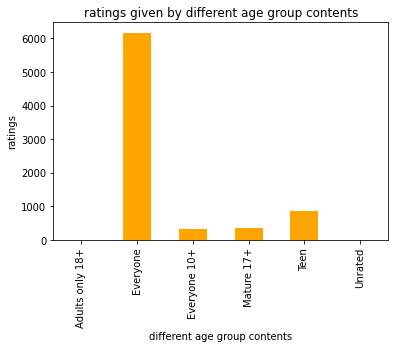

In [ ]:

df1=df.groupby(['Content Rating'])['Rating'].count()
df1.plot.bar(color='orange')
plt.title('ratings given by different age group contents')
plt.ylabel('ratings')
plt.xlabel('different age group contents')
plt.show()

In [ ]:
# Convert the Last Update column to date format from string format
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [ ]:
# Add a new column Year to data frame which contain the year from last updated column
df['Year'] = df['Last Updated'].dt.to_period('Y')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018


In [ ]:
# Count the year wise updation of apps
Year1 = df['Year'].value_counts(ascending=False)

Text(0, 0.5, 'No of Applications')

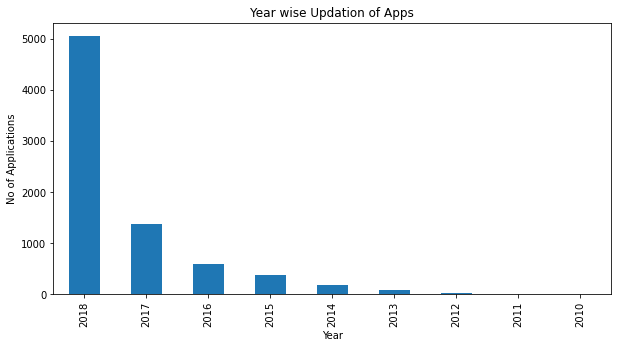

In [ ]:
# Plot the above data in a bar plot
plt.figure(figsize = (10,5))
Year1.plot.bar()
plt.title('Year wise Updation of Apps')
plt.xlabel('Year')
plt.ylabel('No of Applications')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

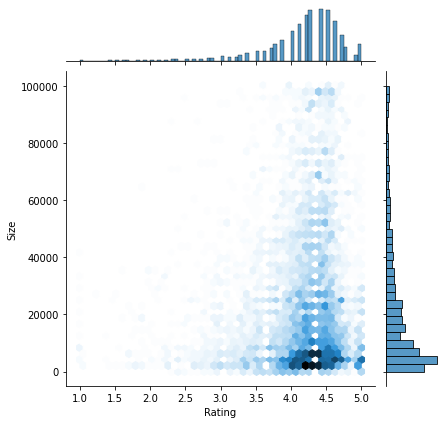

In [ ]:
#lets make a coparision between rating and size of the app
sns.jointplot(x='Rating',y='Size',data=df,kind='hex')  # jointplot takes numeric value only
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

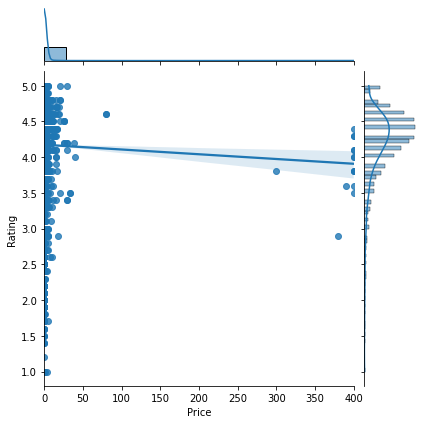

In [ ]:
#effect of price on rating
sns.jointplot(x='Price',y='Rating',data=df,kind='reg')
plt

From above we can assume that the rating is higher for the app which is free or less price if the price will increase the rating will decrease

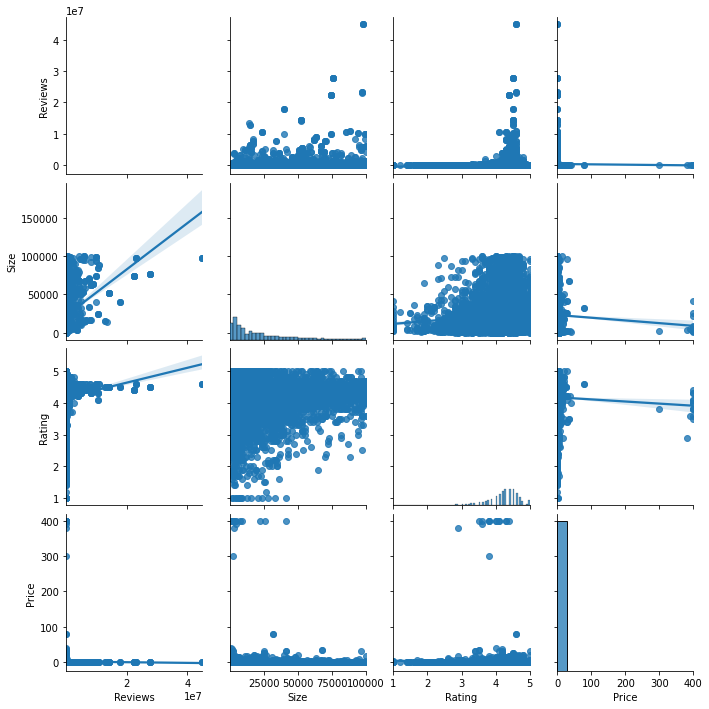

In [ ]:
sns.pairplot(df,vars=['Reviews','Size','Rating','Price'],kind='reg')
plt.show()

In [ ]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.080082,0.084214,0.052951,-0.021274
Reviews,0.080082,1.000000,0.240395,0.626187,-0.010184
Size,0.084214,0.240395,1.000000,0.162731,-0.026255
Installs,0.052951,0.626187,0.162731,1.000000,-0.010853
Price,-0.021274,-0.010184,-0.026255,-0.010853,1.000000


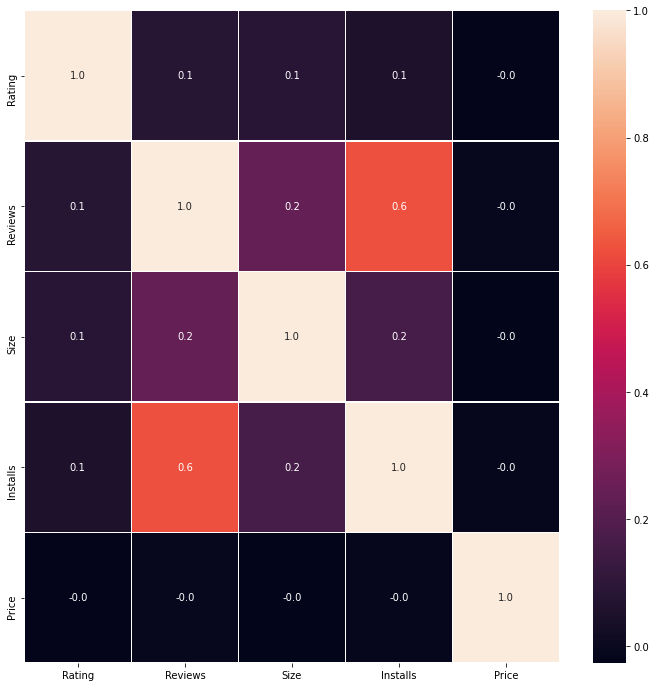

In [ ]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

**lets work on the other Dataset we have**

In [ ]:
user_review=pd.read_csv('/content/drive/MyDrive/capstone project/Copy of User Reviews.csv')


In [ ]:
user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
#check the dimentions of second data
user_review.shape

(64295, 5)

In [ ]:
#now checking the missing values again for second data
user_review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

# **We have to delete the entire row as we saw above some app consist four column as NAN value so we should not condider that rows**

In [ ]:
user_review.dropna(inplace=True)

In [ ]:
user_review.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
user_review.shape

(37427, 5)

In [ ]:
user_review.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


As we saw the mean and 50% is near by so we have very few outlairs

In [ ]:
user_review['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

Text(0, 0.5, 'Frequency')

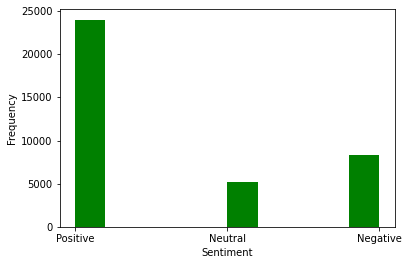

In [ ]:
sentiment1= user_review[~user_review['Sentiment'].isna()]['Sentiment']
plt.hist(sentiment1.values, color='green')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')


In [ ]:
# Classify the apps according to different sentiments
app_sentiment = user_review[['App','Sentiment']].value_counts().to_frame().reset_index()

## Top 15 apps having positive sentiments.

In [ ]:
# Find out the top 15 apps having positive sentiment
positive_sentiment_app = app_sentiment[app_sentiment['Sentiment']=='Positive'].sort_values(by=0,ascending=False)[:15]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

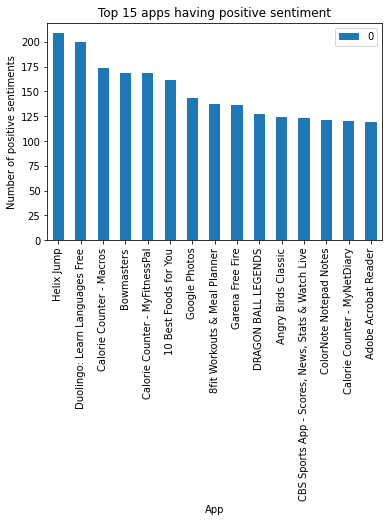

In [ ]:
positive_sentiment_app.plot.bar(x = 'App', y = 0)
plt.xlabel('App')
plt.ylabel('Number of positive sentiments')
plt.title('Top 15 apps having positive sentiment')
plt.xticks(rotation=90)

## Top 15 apps having negative sentiments

In [ ]:
# Find out the apps having negative sentiment
negative_sentiment_app = app_sentiment[app_sentiment['Sentiment']=='Negative'].sort_values(by=0,ascending=False)[:15]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

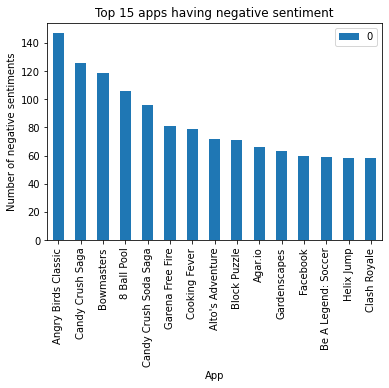

In [ ]:
negative_sentiment_app.plot.bar(x = 'App', y = 0)
plt.xlabel('App')
plt.ylabel('Number of negative sentiments')
plt.title('Top 15 apps having negative sentiment')
plt.xticks(rotation=90)